In [10]:
print("Program 1-----")


import csv

a=[]
with open('finds.csv') as csfile:
    lines=csv.reader(csfile)
    a=list(lines)

num_attributes=len(a[0])-1

hypothesis=['0']*num_attributes
print("Initial hypothesis:",hypothesis)

for i in range(len(a)):
    if(a[i][-1]=='Yes'):
        for j in range(num_attributes):
            if(hypothesis[j]=='0'):
                hypothesis[j]=a[i][j]
            if(hypothesis[j]!=a[i][j]):
                    hypothesis[j]='?'
    print(i+1,'=',hypothesis)
    
print("Final hypothesis: ",hypothesis)


Program 1-----
Initial hypothesis: ['0', '0', '0', '0', '0', '0']
1 = ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
2 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
3 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
4 = ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final hypothesis:  ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [11]:
print("Program 2-----")

import pandas as pd
import numpy as np

data = pd.DataFrame(data=pd.read_csv('finds.csv'))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])

specific_h = concepts[0]
general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

print("Intial S:",specific_h)
print("Intial G:",general_h[0])

for i, h in enumerate(concepts):
    if target[i] == "Yes":
        for x in range(len(specific_h)):
            if h[x] != specific_h[x]:
                specific_h[x] = '?'
                general_h[x][x] = '?'
                
    if target[i] == "No":
        for x in range(len(specific_h)):
            if h[x] != specific_h[x]:
                general_h[x][x] = specific_h[x]       
            else:
                general_h[x][x] = '?'
                
indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]

for i in indices:
     general_h.remove(['?', '?', '?', '?', '?', '?'])
    
        

print("Final S:", specific_h)
print("Final G:", general_h)

Program 2-----
Intial S: ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
Intial G: ['?', '?', '?', '?', '?', '?']
Final S: ['Sunny' 'Warm' 'High' 'Strong' '?' '?']
Final G: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


In [12]:
print("Program 3-----")

import numpy as np
import pandas as pd
from pprint import pprint

def entropy(num, denom):
    return -(num/denom) * np.log2(num/denom)

def total_entropy(data, col):
    mydict = {}
    for elem in data[col]:
        if elem in mydict.keys():
            mydict[elem] += 1
        else:
            mydict[elem] = 1
    total = sum(mydict.values())
    E = 0 
    for key in mydict.keys():
        E += entropy(mydict[key], total)
     
    return E

def get_attributes(data, column):
    return data[column].unique().tolist()

def get_sorted_data(data, column):
    sort = {}
    for column_name in get_attributes(data, column):
        sort[column_name] = data.loc[data[column]==column_name]
    return sort

def get_entropy_by_attribute(sorted_data):
    entropies = {}
    for key, df in sorted_data.items():
        entropies[key] = total_entropy(df, 'play')
    return entropies

def get_info_gain(total_entropy, sorted_data, entropy_by_attribute):
    length = data_size
    total = 0
    for col, df in sorted_data.items():
        total += (len(df) / length) * entropy_by_attribute[col]
    return total_entropy - total

treenodes=[]

def drop_node(data, column):
    return data.drop(column, axis=1)

def id3(tree):
    for branch, data in tree.items():
        if not isinstance(data, pd.DataFrame):
            continue    
        columns = data.columns
        total_entropy_for_data = total_entropy(data.values, -1)
        if len(columns) == 1:
            break
        info_gain_list = []
        for i in range(0, len(data.columns)-1):
            sorted_rows = get_sorted_data(data, columns[i])
            entropy_by_attribute = get_entropy_by_attribute(sorted_rows)
            info_gain = get_info_gain(total_entropy_for_data, sorted_rows, entropy_by_attribute)
            info_gain_list.append(info_gain)
        node = info_gain_list.index(max(info_gain_list))
        branches = get_sorted_data(data, columns[node])
        for attr, df in branches.items():
            if (total_entropy(df, columns[-1]) == 0):
                branches[attr] = df.iloc[0,-1]
            else:
                branches[attr] = df.drop(columns[node], axis=1)
        treenodes.append(columns[node])
        child = {columns[node]: {}}
        tree[branch] = child
        tree[branch][columns[node]] = branches
        print(tree)
        print("----------", "\n\n\n\n")
        id3(tree[branch][columns[node]])
        
data1 = pd.read_csv("weather.csv")
rows = data1.values
data_size = len(data1)
feature_length = len(rows[0])-1


tree = {"ROOT": data1}
X = id3(tree)

Program 3-----
{'ROOT': {'outlook': {'sunny':    temperature humidity    wind play
0          hot     high    weak   no
1          hot     high  strong   no
7         mild     high    weak   no
8         cool   normal    weak  yes
10        mild   normal  strong  yes, 'overcast': 'yes', 'rainy':    temperature humidity    wind play
3         mild     high    weak  yes
4         cool   normal    weak  yes
5         cool   normal  strong   no
9         mild   normal    weak  yes
13        mild     high  strong   no}}}
---------- 




{'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}, 'overcast': 'yes', 'rainy':    temperature humidity    wind play
3         mild     high    weak  yes
4         cool   normal    weak  yes
5         cool   normal  strong   no
9         mild   normal    weak  yes
13        mild     high  strong   no}
---------- 




{'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}, 'overcast': 'yes', 'rainy': {'wind': {'weak': 'yes', 'strong': 'no'}}}
----------

In [13]:

print("Program 3 alternative")

import numpy as np
import math
import csv


class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
        
    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)    
    
    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1
                
    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1       
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)
        
    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0
    
    counts = np.zeros((items.shape[0], 1))
    sums = 0
    
    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False) 
                
    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))
    
    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)
        
    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)
    
    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]
        
    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node
        
    gains = np.zeros((data.shape[1] - 1, 1))
    
    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)
        
    split = np.argmax(gains)
    
    node = Node(metadata[split])    
    metadata = np.delete(metadata, split, 0)    
    
    items, dict = subtables(data, split, delete=True)
    
    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))
    
    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)
        
        
with open('weather.csv') as csfile:
    lines=csv.reader(csfile)
    traindata=list(lines)
metadata=traindata.pop(0)

data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

Program 3 alternative
 outlook
    overcast
       b'yes'
    rainy
       wind
          b'strong'
             b'no'
          b'weak'
             b'yes'
    sunny
       humidity
          b'high'
             b'no'
          b'normal'
             b'yes'


In [14]:
print("Program 4---")

from math import exp
from random import seed
from random import random
import numpy as np
  
  
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            ws=neuron['weights']
            activation = ws[-1]
            for i in range(len(ws)-1):
                activation += ws[i] * inputs[i]

            neuron['output'] = 1.0 / (1.0 + exp(-activation))
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
  
  
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * neuron['output'] * (1.0 - neuron['output'])
  
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
  
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

seed(1) 
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
  

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
n_hidden = 2

network = list()
hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
network.append(hidden_layer)
output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden)]
network.append(output_layer)


train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
    for l in layer:
        print(l)

    


Program 4---
>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
{'weights': [-1.4688375095432329, 1.8508873254395144, 1.0858178629550292], 'output': 0.02998030560442616, 'delta': -0.005954660416232358}
{'weights': [0.37711098142462157, -0.06259098945529863, 0.2765123702642719], 'output': 0.9456229000211323, 'delta': 0.002627965285086383}
{

In [21]:
print("Program 4 Alternative")

import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6])) # Hours Studied, Hours Slept 
y = np.array(([92], [86], [89])) # Test Score

y = y/100 # max test score is 100


#Sigmoid Function
def sigmoid(x): #this function maps any value between 0 and 1
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=10000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons of output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bias_hidden=np.random.uniform(size=(1,hiddenlayer_neurons)) #bias matrix to the hidden layer
weight_hidden=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) #weight matrix to the output layer
bias_output=np.random.uniform(size=(1,output_neurons)) # matrix to the output layer

for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp= hinp1 + bias_hidden #bias_hidden GRADIENT DISCENT
    hlayer_activation = sigmoid(hinp)
    
    outinp1=np.dot(hlayer_activation,weight_hidden)
    outinp= outinp1+ bias_output
    output = sigmoid(outinp)
    
    #Backpropagation
    EO = y-output #Compare prediction with actual output and calculate the gradient of error (Actual – Predicted)

    outgrad = derivatives_sigmoid(output) #Compute the slope/ gradient of hidden and output layer neurons

    d_output = EO * outgrad #Compute change factor(delta) at output layer, dependent on the gradient of error multiplied by the slope of output layer activation

    EH = d_output.dot(weight_hidden.T)  #At this step, the error will propagate back into the network which means error at hidden layer. we will take the dot product of output layer delta with weight parameters of edges between the hidden and output layer (weight_hidden.T).

    hiddengrad = derivatives_sigmoid(hlayer_activation) #how much hidden layer weight contributed to error
    d_hiddenlayer = EH * hiddengrad


    #update the weights
    weight_hidden += hlayer_activation.T.dot(d_output) *lr# dot product of nextlayererror and currentlayerop
    bias_hidden += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

    wh += X.T.dot(d_hiddenlayer) *lr
    bias_output += np.sum(d_output, axis=0,keepdims=True) *lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Program 4 Alternative
Input: 
[[2 9]
 [1 5]
 [3 6]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.893474  ]
 [0.88483348]
 [0.89058605]]


In [15]:
print("Program 5---")
import csv
import random
import math

def safe_div(x,y):
    if y == 0:
        return 0
    return x/y

def loadCsv(filename):
    lines=csv.reader(open(filename, "r"))
    dataset=list(lines)
    for i in range(len(dataset)):
        dataset[i]=[float(x) for x in dataset[i]]
    return dataset

def splitDataset(dataset, splitRatio):
    trainSize=int(len(dataset) * splitRatio)
    trainSet=[]
    copy=list(dataset)
    while len(trainSet) < trainSize:
        index=random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

def separateByClass(dataset):
    separated={}
    for i in range(len(dataset)):
        vector=dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]]=[]
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg=mean(numbers)
    variance=sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries=[(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated=separateByClass(dataset)
    summaries={}
    for classValue, instances in separated.items():
        summaries[classValue]=summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent=math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities={}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue]=1
        for i in range(len(classSummaries)):
            mean, stdev=classSummaries[i]
            x=inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities=calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb=None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb=probability
            bestLabel=classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions=[]
    for i in range(len(testSet)):
        result=predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct=0
    for i in range(len(testSet)):
    #print(testSet[i][-1]," ",predictions[i])
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    filename='pima-indians-diabetes.data.csv'
    splitRatio=0.75
    dataset=loadCsv(filename)
    trainingSet,testSet=splitDataset(dataset, splitRatio) 
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset),
    len(trainingSet), len(testSet)))

    summaries=summarizeByClass(trainingSet)
    predictions=getPredictions(summaries, testSet)
    accuracy=getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))
main()


Program 5---
Split 768 rows into train=576 and test=192 rows
Accuracy: 71.35416666666666%


In [16]:
print("Program 6---")
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True)
twenty_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True)

count_vect = CountVectorizer()
X_train_tf = count_vect.fit_transform(twenty_train.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape
mod = MultinomialNB()
mod.fit(X_train_tfidf, twenty_train.target)
X_test_tf = count_vect.transform(twenty_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
predicted = mod.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(twenty_test.target, predicted))
print(classification_report(twenty_test.target,predicted,target_names=twenty_test.target_names))
print("confusion matrix is \n",metrics.confusion_matrix(twenty_test.target, predicted))


Program 6---
Accuracy: 0.8348868175765646
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502

confusion matrix is 
 [[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


In [17]:
print("Program 7---")
import bayespy as bp
import numpy as np
import csv 
from colorama import init
from colorama import Fore, Back, Style
init()

#Age
ageEnum = {'SuperSeniorCitizen':0, 'SeniorCitizen':1, 'MiddleAged':2, 'Youth':3, 'Teen':4}
# Gender
genderEnum = {'Male':0, 'Female':1}
# FamilyHistory
familyHistoryEnum = {'Yes':0, 'No':1}
# Diet(Calorie Intake)
dietEnum = {'High':0, 'Medium':1, 'Low':2}
# LifeStyle
lifeStyleEnum = {'Athlete':0, 'Active':1, 'Moderate':2, 'Sedetary':3}	
# Cholesterol
cholesterolEnum = {'High':0, 'BorderLine':1, 'Normal':2}
# HeartDisease
heartDiseaseEnum = {'Yes':0, 'No':1}
#heart_disease_data.csv
with open('heart_disease_data.csv') as csvfile:
    lines = csv.reader(csvfile)
    dataset = list(lines)
    data = []
    for x in dataset:	
        data.append([ageEnum[x[0]],genderEnum[x[1]],familyHistoryEnum[x[2]],dietEnum[x[3]],lifeStyleEnum[x[4]],cholesterolEnum[x[5]],heartDiseaseEnum[x[6]]])
data = np.array(data)
N = len(data)

# Input data column assignment
p_age = bp.nodes.Dirichlet(1.0*np.ones(5))
age = bp.nodes.Categorical(p_age, plates=(N,))
age.observe(data[:,0])

p_gender = bp.nodes.Dirichlet(1.0*np.ones(2))
gender = bp.nodes.Categorical(p_gender, plates=(N,))
gender.observe(data[:,1])

p_familyhistory = bp.nodes.Dirichlet(1.0*np.ones(2))
familyhistory = bp.nodes.Categorical(p_familyhistory, plates=(N,))
familyhistory.observe(data[:,2])

p_diet = bp.nodes.Dirichlet(1.0*np.ones(3))
diet = bp.nodes.Categorical(p_diet, plates=(N,))
diet.observe(data[:,3])

p_lifestyle = bp.nodes.Dirichlet(1.0*np.ones(4))
lifestyle = bp.nodes.Categorical(p_lifestyle, plates=(N,))
lifestyle.observe(data[:,4])

p_cholesterol = bp.nodes.Dirichlet(1.0*np.ones(3))
cholesterol = bp.nodes.Categorical(p_cholesterol, plates=(N,))
cholesterol.observe(data[:,5])

p_heartdisease = bp.nodes.Dirichlet(np.ones(2), plates=(5, 2, 2, 3, 4, 3))
heartdisease = bp.nodes.MultiMixture([age, gender, familyhistory, diet, lifestyle, cholesterol], bp.nodes.Categorical, p_heartdisease)
heartdisease.observe(data[:,6])
p_heartdisease.update()

res = bp.nodes.MultiMixture([int(input('Enter Age: ' + str(ageEnum))), int(input('Enter Gender: ' + str(genderEnum))), int(input('Enter FamilyHistory: ' + str(familyHistoryEnum))), int(input('Enter dietEnum: ' + str(dietEnum))), int(input('Enter LifeStyle: ' + str(lifeStyleEnum))), int(input('Enter Cholesterol: ' + str(cholesterolEnum)))], bp.nodes.Categorical, p_heartdisease).get_moments()[0][heartDiseaseEnum['Yes']]
print("Probability(HeartDisease) = " +  str(res))


Program 7---


/run/media/shravan/SHRAVAN/Programs/Python/virtual/env/lib/python3.7/site-packages/bayespy/inference/vmp/nodes/categorical.py:107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  u0[[np.arange(np.size(x)), np.ravel(x)]] = 1


Enter Age: {'SuperSeniorCitizen': 0, 'SeniorCitizen': 1, 'MiddleAged': 2, 'Youth': 3, 'Teen': 4}1
Enter Gender: {'Male': 0, 'Female': 1}1
Enter FamilyHistory: {'Yes': 0, 'No': 1}0
Enter dietEnum: {'High': 0, 'Medium': 1, 'Low': 2}1
Enter LifeStyle: {'Athlete': 0, 'Active': 1, 'Moderate': 2, 'Sedetary': 3}0
Enter Cholesterol: {'High': 0, 'BorderLine': 1, 'Normal': 2}1


/run/media/shravan/SHRAVAN/Programs/Python/virtual/env/lib/python3.7/site-packages/bayespy/inference/vmp/nodes/categorical.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  u0[[np.arange(np.size(x)), np.ravel(x)]] = 1


Probability(HeartDisease) = 0.5


Program 8---


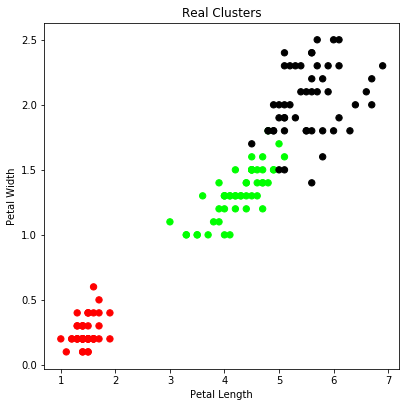

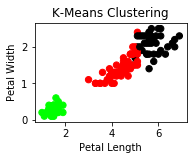

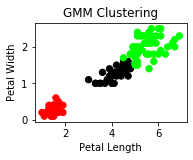

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


In [18]:
print("Program 8---")
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np


iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']


model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14, 14))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Class'] = data.target_names[data.target]
x = df.iloc[:, :-1].values
y = df.Class.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
predictions = knn_classifier.predict(x_test)

# print(predictions)

print("Training accuracy Score is : ", accuracy_score(y_train,knn_classifier.predict(x_train)))
print("Testing accuracy Score is : ", accuracy_score(y_test, knn_classifier.predict(x_test)))
print("Training Confusion Matrix is : \n", confusion_matrix(y_train,knn_classifier.predict(x_train)))
print("Testing Confusion Matrix is : \n", confusion_matrix(y_test,knn_classifier.predict(x_test)))


Training accuracy Score is :  0.9583333333333334
Testing accuracy Score is :  1.0
Training Confusion Matrix is : 
 [[36  0  0]
 [ 0 43  3]
 [ 0  2 36]]
Testing Confusion Matrix is : 
 [[14  0  0]
 [ 0  4  0]
 [ 0  0 12]]


Program 10---


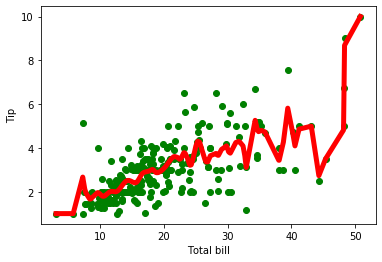

In [20]:
print("Program 10---")


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) 
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
    
data = pd.read_csv('data10_tips.csv')
bill = np.array(data.total_bill) 
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) 
ypred = localWeightRegression(X,mtip,0.5) 
graphPlot(X,ypred)
